In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Arun\Downloads\ai_adoption_dataset.csv")
df=df.drop("user_feedback",axis=1)
df.head(10)

,country,industry,ai_tool,adoption_rate,daily_active_users,year,age_group,company_size
0,USA,Technology,ChatGPT,40.45,2461,2023,35-44,Startup
1,France,Manufacturing,Midjourney,35.72,8496,2024,18-24,Enterprise
2,Australia,Transportation,ChatGPT,13.47,8641,2024,45-54,Startup
3,UK,Manufacturing,ChatGPT,48.46,3488,2023,45-54,Enterprise
4,UK,Agriculture,Stable Diffusion,34.06,1124,2024,45-54,SME
5,Brazil,Education,Midjourney,64.54,3267,2024,55+,Startup
6,USA,Healthcare,Bard,81.83,4265,2023,35-44,Enterprise
7,Australia,Education,ChatGPT,20.85,5940,2023,25-34,Enterprise
8,China,Retail,Midjourney,39.90,613,2024,55+,SME
9,USA,Agriculture,Midjourney,20.53,8310,2023,35-44,Startup


In [2]:
from sklearn.preprocessing import LabelEncoder
unique_cols=["country","industry","ai_tool","age_group","company_size"]

le=LabelEncoder()
for i in unique_cols:
    df[i]=le.fit_transform(df[i])

df.head()


,country,industry,ai_tool,adoption_rate,daily_active_users,year,age_group,company_size
0,9,6,1,40.45,2461,2023,2,2
1,4,4,3,35.72,8496,2024,0,0
2,0,7,1,13.47,8641,2024,3,2
3,8,4,1,48.46,3488,2023,3,0
4,8,0,4,34.06,1124,2024,3,1


In [3]:
from sklearn.model_selection import train_test_split
x=df.drop("adoption_rate",axis=1)
y=df["adoption_rate"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)



In [4]:
x_train=x_train.to_numpy("float32")
x_test=x_test.to_numpy("float32")
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
from sklearn.preprocessing import StandardScaler
sclaer = StandardScaler()
x_train=sclaer.fit_transform(x_train)
x_test=sclaer.fit_transform(x_test)


import torch
device=torch.device("cpu")
x_train=torch.tensor(x_train).to(device)
y_train=torch.tensor(y_train).to(device)
x_test=torch.tensor(x_test).to(device)
y_test=torch.tensor(y_test).to(device)



print(x_train.size())
print(x_test.dtype)
print(device)

torch.Size([101500, 7])
torch.float32
cpu


In [5]:
import torch.nn as nn
import torch.nn.functional as F
class ann_model(nn.Module):
    def __init__(self,input_layer=7,hidden_layer1=5,hidden_layer2=5,output=1):
        super().__init__()
        self.f_connected1=nn.Linear(input_layer,hidden_layer1)
        self.f_connected2=nn.Linear(hidden_layer1,hidden_layer2)
        self.output_layer=nn.Linear(hidden_layer2,output)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=F.relu(self.output_layer(x))
        return x

       

In [6]:
model=ann_model().to(device)
print(next(model.parameters()).device)
torch.manual_seed(30)
loss=nn.SmoothL1Loss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.000001)
print(x_test.dtype)

cpu
torch.float32


In [ ]:
from torch.utils.data import DataLoader,TensorDataset
datset=TensorDataset(x_train,y_train)
batch_=DataLoader(datset,batch_size=16,shuffle=True)

epochs=500
loss_function=[]

for i in range(epochs):
    for x_train,y_train in batch_:
        x_train,y_train=x_train.float(),y_train.float()
    y_pred=model.forward(x_test)
    current_loss=loss(y_pred,y_train)
    loss_function.append(current_loss)
    if i%10==1:
        print(f"for loss in {i}epoch is{current_loss}on{device}")
    optimizer.zero_grad()
    current_loss.backward()
    optimizer.step()


C:\Users\Arun\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py:1042: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([43500, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


for loss in 1epoch is52.81149673461914oncpu
for loss in 11epoch is40.71147918701172oncpu
for loss in 21epoch is42.871463775634766oncpu
for loss in 31epoch is41.788936614990234oncpu
for loss in 41epoch is43.868797302246094oncpu
for loss in 51epoch is51.40556716918945oncpu
for loss in 61epoch is54.935546875oncpu
for loss in 71epoch is44.591365814208984oncpu
for loss in 81epoch is56.09884262084961oncpu
for loss in 91epoch is40.686256408691406oncpu
for loss in 101epoch is42.396305084228516oncpu
for loss in 111epoch is49.175453186035156oncpu
for loss in 121epoch is33.5704345703125oncpu
for loss in 131epoch is36.007911682128906oncpu
for loss in 141epoch is59.83872604370117oncpu
for loss in 151epoch is42.433712005615234oncpu
for loss in 161epoch is47.40202331542969oncpu
for loss in 171epoch is42.011837005615234oncpu
for loss in 181epoch is46.08698272705078oncpu
for loss in 191epoch is52.03862380981445oncpu
for loss in 201epoch is45.84444046020508oncpu
for loss in 211epoch is45.149017333984375

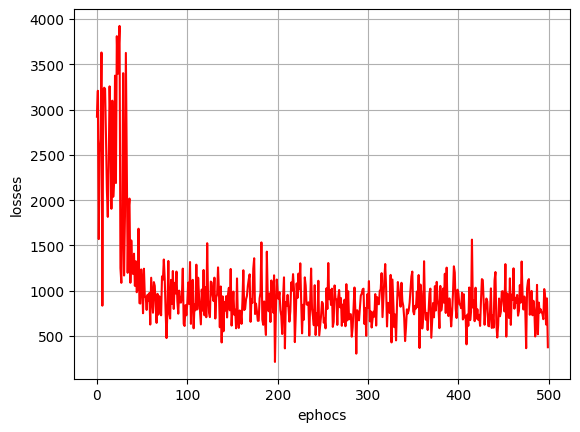

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),torch.tensor(loss_function),color="red")
plt.xlabel("ephocs")
plt.ylabel("losses")
plt.grid()
plt.show()